In [5]:
from google.colab import files
uploaded = files.upload()

Saving merged.csv to merged (1).csv


In [8]:
import pandas as pd 
df=pd.read_csv('merged.csv', encoding="ISO-8859-1")

In [10]:
df.shape

(90, 3)

In [11]:
df.head()

,textComment,commenterLocation,commenterName
0,"@AbdiTV äóìPipe down, your wearing rentalsäó_ôÖ_",Mombasa,Junaid kassam_ôÁ_ôÈ
1,@AbdiTV And so it begins,NaN,bussy patrol _ô___ô_
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,@AbdiTV isnäó»t this a subplot on parks and rec?,he/him,mulish leninist


In [14]:
df = df.dropna(subset=["textComment", "commenterLocation", "commenterName"])


In [16]:
df.shape

(65, 3)

In [17]:
from textblob import TextBlob

In [18]:
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity

In [23]:
df['Subjectivity']=df['textComment'].apply(getTextSubjectivity)
df['Polarity']=df['textComment'].apply(getTextPolarity) #polarity<0 = -ve sentiment, =0 =neutral and >0 = +ve
df.head()

,textComment,commenterLocation,commenterName,Subjectivity,Polarity
0,"@AbdiTV äóìPipe down, your wearing rentalsäó_ôÖ_",Mombasa,Junaid kassam_ôÁ_ôÈ,0.288889,-0.155556
4,@AbdiTV isnäó»t this a subplot on parks and rec?,he/him,mulish leninist,0.000000,0.000000
6,@AbdiTV @Richpaki1 bet youäó»re excited,"Hermosillo, Sonora",Epifanio Vargas_ô__ô_,0.750000,0.375000
7,@AbdiTV @Graciouskisay Drill videos about to h...,"Stuttgart, Germany",LABISZ,0.500000,0.500000
8,@AbdiTV @benpaterson_,"Essex, UK",Hannah,0.000000,0.000000


In [24]:
def getTextAnalysis(a):
  if a<0:
    return "Negative"
  elif a==0:
    return "Neutral"
  else:
    return "Positive"

In [26]:
df["Score"]=df['Polarity'].apply(getTextAnalysis)
df.head(1)

,textComment,commenterLocation,commenterName,Subjectivity,Polarity,Score
0,"@AbdiTV äóìPipe down, your wearing rentalsäó_ôÖ_",Mombasa,Junaid kassam_ôÁ_ôÈ,0.288889,-0.155556,Negative


In [67]:
positive_tweets = df[df['Score'] == 'Positive']
negative_tweets = df[df['Score'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:6].iterrows():
  print(' -' + row['textComment'])

print('negative tweets')
for i, row in negative_tweets[:6].iterrows():
  print(' -' + row['textComment'])

positive tweets
 -@AbdiTV @Richpaki1 bet youäó»re excited
 -@AbdiTV @Graciouskisay Drill videos about to have more logos than Premier League interview backgrounds
 -@AbdiTV Rent is cheap uno looool
 -@AbdiTV in a world where itäó»s bad for business for certain celebrities and influencers to be seen wearing the same thing twice, this is not a terrible thing.  encourages sustainability in fashion and also making it accessible for up and coming stylists to access more high end pieces.
 -@SPatronne Canäó»t actually knock this one sis, Golden rule in financeäó_äóìif it depreciates lease it, if it appreciate buy it!äó
 -@SPatronne From when I saw a girl rent out an expensive dress just too go out that's when I knew anything is possible lol
negative tweets
 -@AbdiTV äóìPipe down, your wearing rentalsäó_ôÖ_
 -@AbdiTV If I canäó»t afford something, I wonäó»t get it. 
People are wasting money to try to impress others and itäó»s sad, you really wanna spend money to wear something for one evenin

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

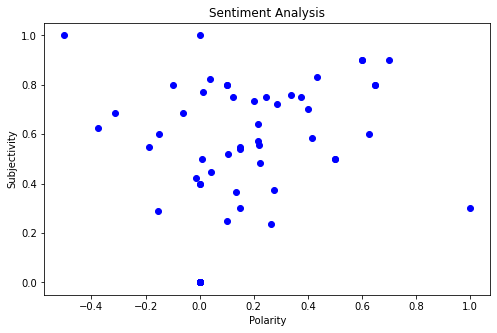

In [61]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df["Polarity"], df["Subjectivity"], color="blue")
plt.title("Sentiment Analysis") 
plt.xlabel("Polarity")
plt.ylabel("Subjectivity") 
plt.show() 

In [62]:
positive=df[df['Score']=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"% of Positive tweets")
pos=positive.shape[0]/df.shape[0]*100

55.38461538461539% of Positive tweets


In [63]:
negative=df[df['Score']=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"% of Negative tweets")
neg=negative.shape[0]/df.shape[0]*100

13.846153846153847% of Negative tweets


In [64]:
neutral=df[df['Score']=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of Neutral tweets")
neu=neutral.shape[0]/df.shape[0]*100

30.76923076923077% of Neutral tweets


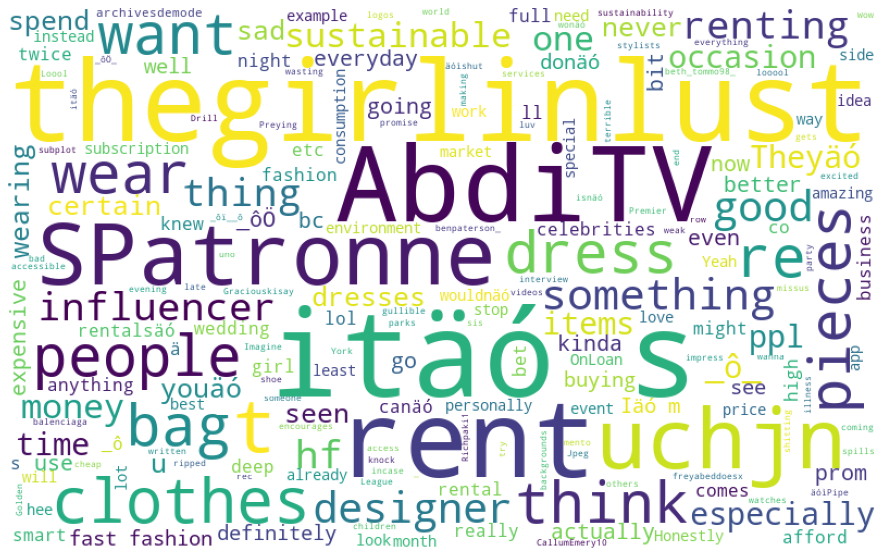

In [65]:
all_words = ' '.join([text for text in df['textComment']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()